In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
#df.info()

In [10]:
#df.isnull().count()

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

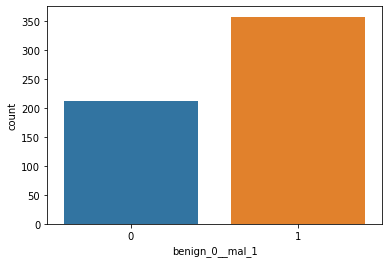

In [11]:
sns.countplot(x='benign_0__mal_1',
              data=df)

In [14]:
df.corr()['benign_0__mal_1'].sort_values(ascending=True)

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

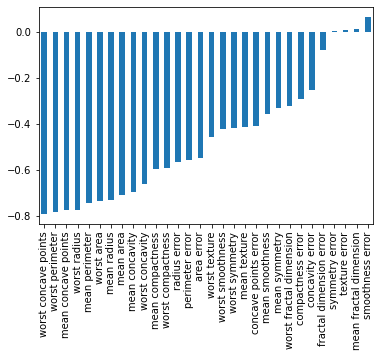

In [17]:
df.corr()['benign_0__mal_1'][:-1].sort_values(ascending=True).plot(kind='bar')

In [18]:
X = df.drop('benign_0__mal_1', axis = 1)
y = df['benign_0__mal_1']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.25, random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [26]:
X_train.shape

(426, 30)

In [28]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

#BINARY CLASSIFICATION (benign/malignant) 
#--> activ. function = sigmoid
model.add(Dense(units=1,activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy'
               )

In [29]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600,
          validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6803 - val_loss: 0.6423
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6269 - val_loss: 0.6006
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5870 - val_loss: 0.5576
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5437 - val_loss: 0.5084
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4953 - val_loss: 0.4564
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4449 - val_loss: 0.4056
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3978 - val_loss: 0.3600
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3536 - val_loss: 0.3164
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3144 - val_loss: 0.2805
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2815 - val_loss: 0.2522
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0507 - val_loss: 0.1154
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0513 - val_loss: 0.1101
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0522 - val_loss: 0.1059
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0526 - val_loss: 0.1196
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0520 - val_loss: 0.1176
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0495 - val_loss: 0.1067
Epoch 89/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0515 - val_loss: 0.1172
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0518 - val_loss: 0.1088
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0495 - val_loss: 0.1067
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0514 - val_loss: 0.1086


14/14 [==============================] - 0s 4ms/step - loss: 0.0424 - val_loss: 0.1072
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0448 - val_loss: 0.1433
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0450 - val_loss: 0.1108
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0444 - val_loss: 0.1294
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0421 - val_loss: 0.1287
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.1176
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0391 - val_loss: 0.1259
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0375 - val_loss: 0.1213
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0371 - val_loss: 0.1258
Epoch 173/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0397 - val_loss: 0.1296
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0294 - val_loss: 0.1225
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0329 - val_loss: 0.1328
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0286 - val_loss: 0.1304
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0304 - val_loss: 0.1613
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0364 - val_loss: 0.1154
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0307 - val_loss: 0.1355
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0307 - val_loss: 0.1273
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0315 - val_loss: 0.1406
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0299 - val_loss: 0.1475
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0285 - val_loss: 0.1350
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0266 - val_loss: 0.1262
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0255 - val_loss: 0.1412
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0278 - val_loss: 0.1413
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0223 - val_loss: 0.1431
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0227 - val_loss: 0.1489
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0226 - val_loss: 0.1522
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.1229
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0247 - val_loss: 0.1632
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0237 - val_loss: 0.1400
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.1224
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0244 - val_loss: 0.1772
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.1614
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0165 - val_loss: 0.1402
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0175 - val_loss: 0.1452
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0203 - val_loss: 0.1781
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0200 - val_loss: 0.1396
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.1460
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0179 - val_loss: 0.1469
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.1522
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0248 - val_loss: 0.1851
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0153 - val_loss: 0.1767
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0151 - val_loss: 0.1621
Epoch 490/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.1740
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.1701
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.1885
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0147 - val_loss: 0.1630
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0136 - val_loss: 0.1635
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0150 - val_loss: 0.1327
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.1868
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.1530
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.1667
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.1648
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.2049
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0181 - val_loss: 0.1330
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.2597
Epoch 574/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0104 - val_loss: 0.1364
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.2163
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.1699
Epoch 577/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 0.1724
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.1788
Epoc

In [34]:
model.history.history

{'loss': [0.6803411841392517,
  0.6269101500511169,
  0.5869991183280945,
  0.5436707735061646,
  0.4952957332134247,
  0.4448959529399872,
  0.3977668285369873,
  0.3535705804824829,
  0.31439676880836487,
  0.2814943790435791,
  0.2529369294643402,
  0.22983436286449432,
  0.2120901644229889,
  0.1959945261478424,
  0.18258187174797058,
  0.17477287352085114,
  0.1602696180343628,
  0.15273576974868774,
  0.14874665439128876,
  0.13391372561454773,
  0.1311495304107666,
  0.12321333587169647,
  0.1201028972864151,
  0.1178915724158287,
  0.1091957688331604,
  0.10711704939603806,
  0.10546234995126724,
  0.09549696743488312,
  0.09177204966545105,
  0.09242952615022659,
  0.08819824457168579,
  0.08585947751998901,
  0.08441147953271866,
  0.0816488116979599,
  0.07902132719755173,
  0.08034312725067139,
  0.08049716800451279,
  0.07600083202123642,
  0.0736878365278244,
  0.07189124077558517,
  0.07083863019943237,
  0.07056498527526855,
  0.06885965913534164,
  0.06793683022260666,

In [33]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

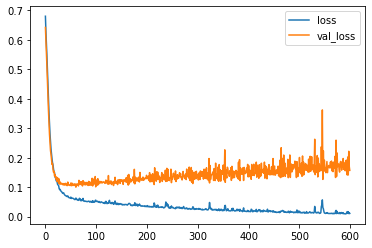

In [35]:
losses.plot()

In [45]:
#Overfitting 
#Solution - EarlyStopping

In [37]:
#redefine model
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

#BINARY CLASSIFICATION (benign/malignant) 
#--> activ. function = sigmoid
model.add(Dense(units=1,activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy'
               )

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
#help(EarlyStopping)

In [41]:
early_stop = EarlyStopping(monitor = 'val_loss',
                           mode = 'min',
                           verbose = 1,
                           patience = 25)

In [42]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600,
          validation_data=(X_test,y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6772 - val_loss: 0.6585
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6333 - val_loss: 0.6190
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5860 - val_loss: 0.5766
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5416 - val_loss: 0.5292
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4917 - val_loss: 0.4733
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4374 - val_loss: 0.4139
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3859 - val_loss: 0.3637
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3394 - val_loss: 0.3211
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3038 - val_loss: 0.2849
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2765 - val_loss: 0.2581
Epoch 11

In [43]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

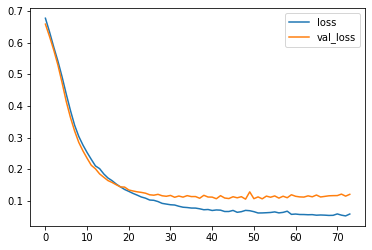

In [44]:
losses.plot()

In [ ]:
# Using Dropout to optimize model
# Dropout(0.2) means 20% probability of switching off
# a neuron during fitting. normally 0.2-0.5

# we will go for 0.5

In [46]:
from tensorflow.keras.layers import Dropout

In [47]:
#redefine model again
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION (benign/malignant) 
#--> activ. function = sigmoid
model.add(Dense(units=1,activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy'
               )

In [48]:
early_stop = EarlyStopping(monitor = 'val_loss',
                           mode = 'min',
                           verbose = 1,
                           patience = 25)

In [49]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600,
          validation_data=(X_test,y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6932 - val_loss: 0.6858
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6901 - val_loss: 0.6679
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6653 - val_loss: 0.6510
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6541 - val_loss: 0.6377
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6537 - val_loss: 0.6195
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6266 - val_loss: 0.6028
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6274 - val_loss: 0.5844
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6156 - val_loss: 0.5658
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6006 - val_loss: 0.5487
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5903 - val_loss: 0.5310
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0991 - val_loss: 0.0860
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1206 - val_loss: 0.0865
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1206 - val_loss: 0.0780
Epoch 86/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1116 - val_loss: 0.0869
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1115 - val_loss: 0.0886
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1313 - val_loss: 0.0843
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1235 - val_loss: 0.0801
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1269 - val_loss: 0.0934
Epoch 91/600
14/14 [==============================] - 0s 10ms/step - loss: 0.1141 - val_loss: 0.0857
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1037 - val_loss: 0.0836

<AxesSubplot:>

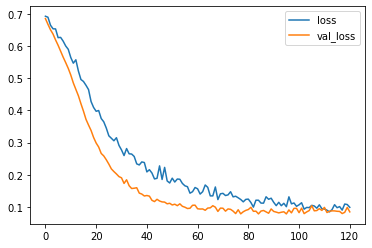

In [50]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [51]:
### Evaluation

In [56]:
model.predict(X_test) > 0.5

array([[ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [

In [59]:
predictions = (model.predict(X_test) > 0.5)*1

In [60]:
#predictions

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [63]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
